In [7]:
def get_spaced_colors(N):
    N = 10
    HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
    RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
    return RGB_tuples

In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import config
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.parser import parse
import pdb
import seaborn as sns
from tqdm import tqdm
import re
from collections import defaultdict
from Instrument import calculate_vol

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR
from arch import arch_model


# calculate_vol()

def benchmark(df):
    """ Forecast next volatility with current volatility
    """
    vols_pred = df['vol_6'].shift(1)
    vols_pred = vols_pred.fillna(vols_pred.iloc[1])
    return vols_pred

def predict_AR(df, p=1):
    """ Forecast next step volatility with expanding window using AR(p) model
    """

    fit = lambda x: AR(x).fit(maxlag=p, disp=0).predict(start=x.size, end=x.size)
    vols_pred = df['vol_6'].expanding(min_periods=30).apply(fit)
    return vols_pred

def get_mse(vols_true, vols_pred):
    """calculate mean squared error."""
    vols_pred_drop = vols_pred.dropna()
    mse = mean_squared_error(vols_true[vols_pred_drop.index], vols_pred_drop)
    return mse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
id = 'ag1612'
vol_full_df = pd.read_csv(os.path.join(config.OUTPUT_DATA_PATH, id + '.csv'), parse_dates=['datetime'], index_col=0)
vol_full_df.set_index('datetime', inplace=True)
vols_pred_benchmark = benchmark(vol_full_df)
vols_pred_AR = predict_AR(vol_full_df, 1)

0.00616307123024
0.00172238166048


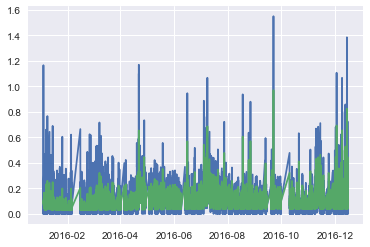

In [95]:
for vols_pred in vols_pred_benchmark, vols_pred_AR:
    mse = get_mse(vol_full_df['vol_6'], vols_pred)
    print(mse)
plt.plot(vol_full_df.vol_6, label='original')
plt.plot(vols_pred_AR, label='pred')

In [83]:
fit = lambda x: AR(x).fit(maxlag=1, disp=0).predict(start=x.size, end=x.size)
x = pd.Series(range(100) + 0.1 * np.random.random(100), index=pd.date_range('2006/1/1', periods=100))
x_pred = x.expanding(min_periods=10).apply(fit)
plt.plot(x, label='x')
plt.plot(x_pred, label='x_pred')
plt.legend()

In [6]:
d = {'a': 1, 'b': 2}
for k, v in d.items():
    print(k)
    print(v)

a
1
b
2
